In [ ]:

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import seaborn as sns
# import various functions to perform classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [ ]:
# https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification
bank = pd.read_csv('/content/new_train.csv')
# test = pd.read_csv('/content/new_test.csv')

In [ ]:
bank.head(30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
bank.columns
bank.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
bank.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
bank.duplicated().sum()

np.int64(8)

In [ ]:
bank.drop_duplicates(inplace = True)

Inconsistency Check


In [ ]:
bank['y'].value_counts()

,count
y,
no,29230
yes,3712


In [ ]:
bank['y'].value_counts(normalize = True)

,proportion
y,
no,0.887317
yes,0.112683


In [ ]:
catcols = bank.select_dtypes(include='object')
catcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y']
for i in columns:
  print(i)
  le = LabelEncoder()
  bank[i] = le.fit_transform(bank[i])

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0


In [ ]:
numcols = bank.select_dtypes(include="int64")
numcols.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

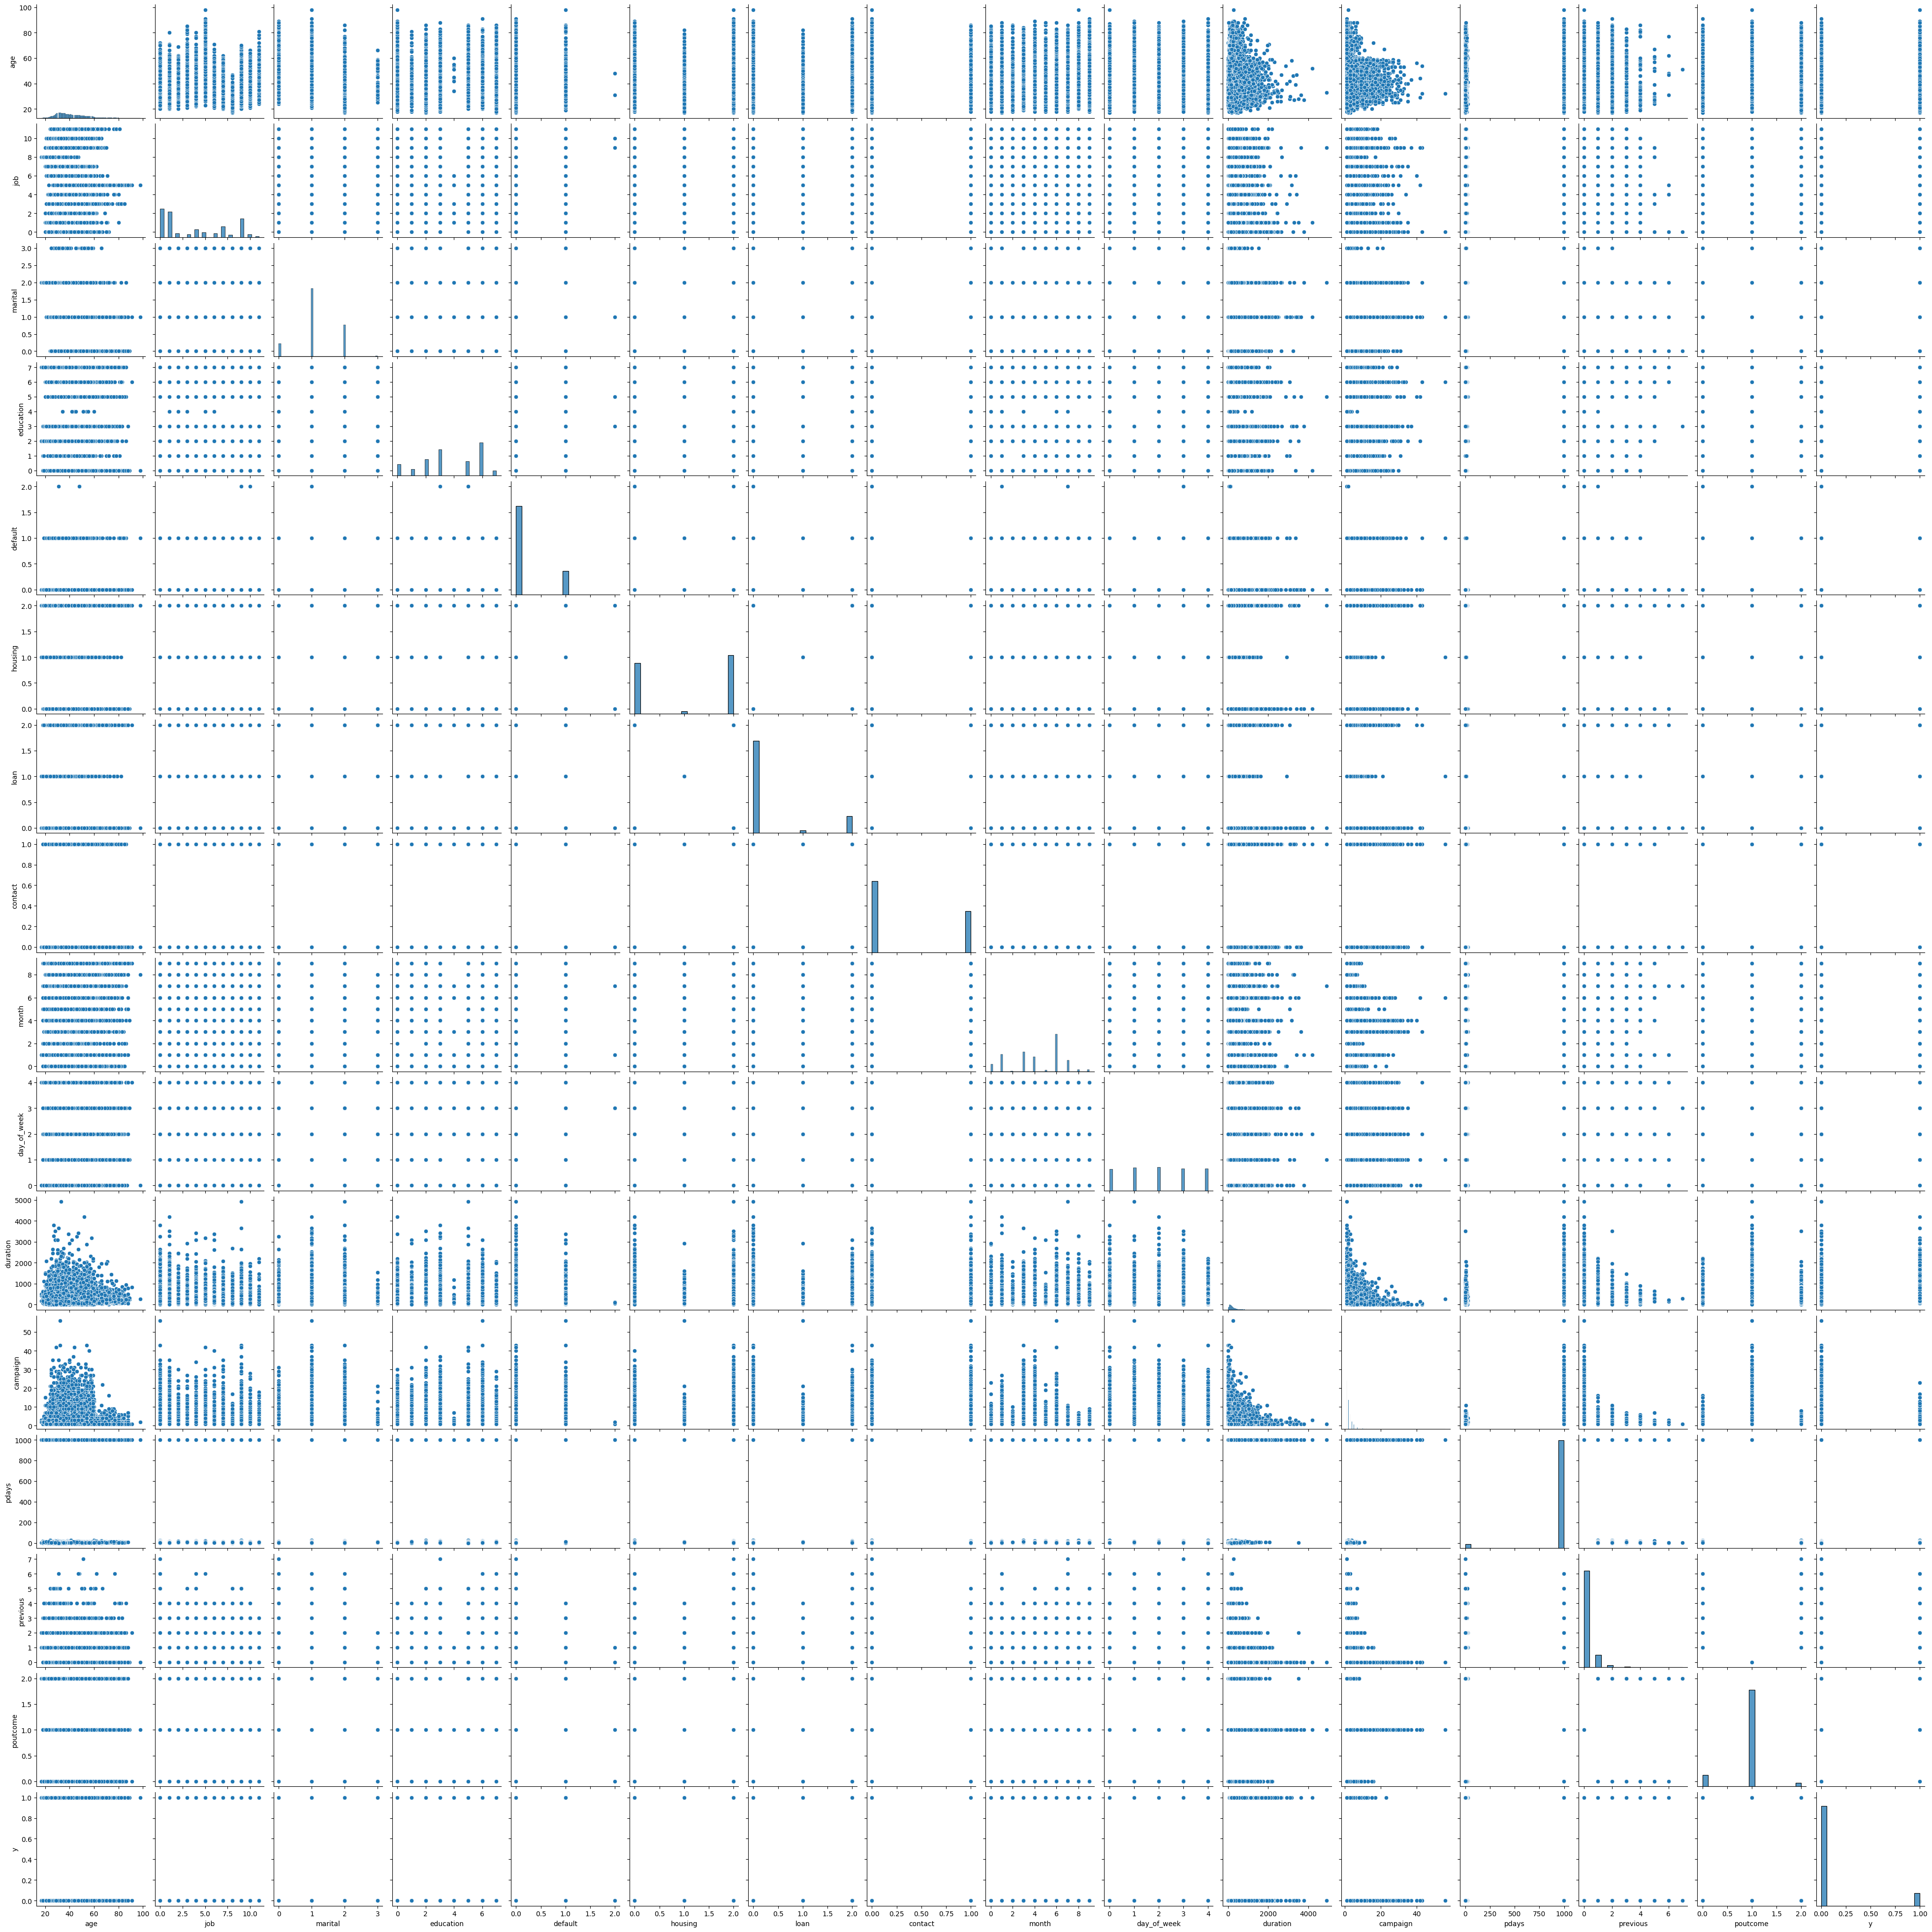

In [ ]:
sns.pairplot(bank)

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in bank.columns if col in
              bank.select_dtypes(include=object).columns]

# # Extracting All Features:
features = [col for col in bank.columns if col not in ['y']]

print(features)
catFeatures

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


[]

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in bank.columns if col in
              bank.select_dtypes(include=object).columns]

from sklearn.preprocessing import LabelEncoder
X = bank
# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(bank[col])

In [ ]:
y=bank[["y"]]
X=bank.drop(["y"],axis=1)


In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1


In [ ]:
y

,y
0,0
1,0
2,1
3,0
4,0
...,...
32945,0
32946,0
32947,0
32948,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1


In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test) * 100))

                   Logistic Regression: 90.55%
                  Gaussian Naive Bayes: 87.89%
                   K-Nearest Neighbors: 89.72%
                Support Vector Machine: 90.24%
                          RandomForest: 90.48%


In [ ]:
print("Before Smote")
print('''Logistic Regression: 89.36%
        Gaussian Naive Bayes: 87.71%
        K-Nearest Neighbors: 88.70%
        Support Vector Machine: 89.39%
        RandomForest: 90.70%''')



Before Smote
Logistic Regression: 89.36%
        Gaussian Naive Bayes: 87.71%
        K-Nearest Neighbors: 88.70%
        Support Vector Machine: 89.39%
        RandomForest: 90.70%


In [ ]:
y.value_counts()

,count
y,
0,29230
1,3712


Confusion Matrix
[[7151  163]
 [ 615  307]]


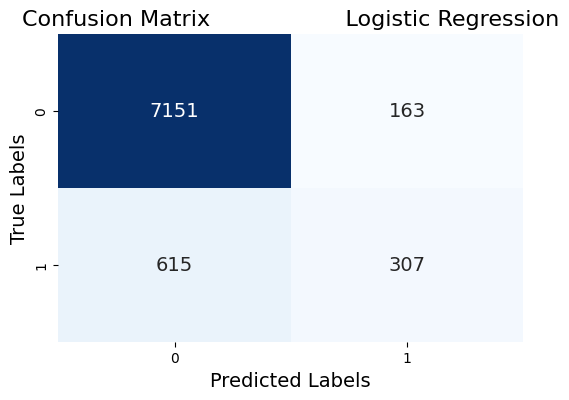

Confusion Matrix
[[6845  469]
 [ 528  394]]


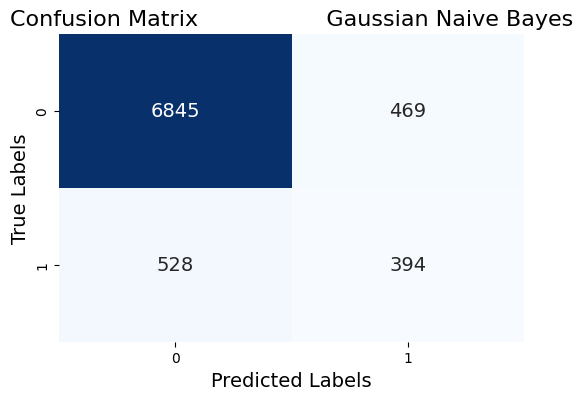

Confusion Matrix
[[7047  267]
 [ 580  342]]


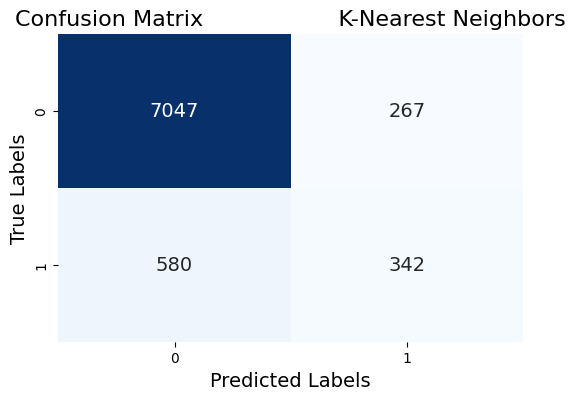

Confusion Matrix
[[7171  143]
 [ 661  261]]


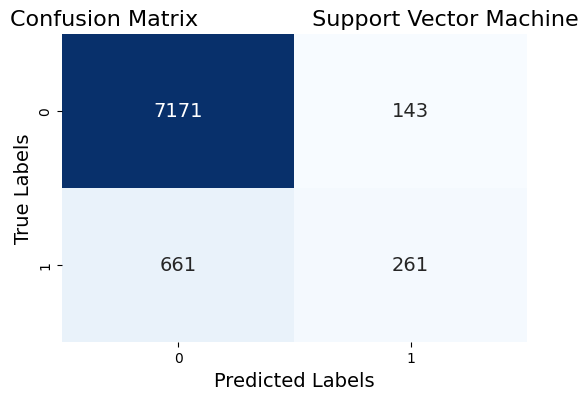

Confusion Matrix
[[7088  226]
 [ 558  364]]


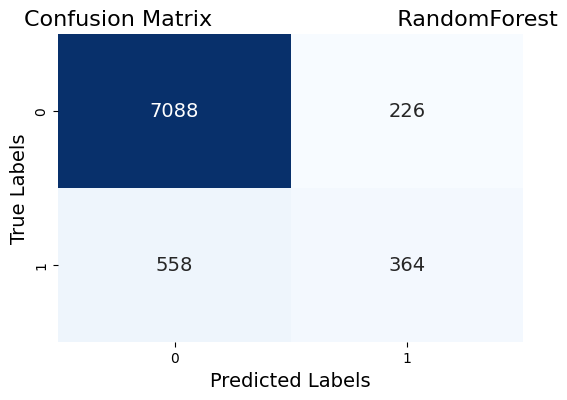

In [ ]:


for name, model in models.items():
  y_pred = model.predict(X_test)
  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title(f'Confusion Matrix{name}', fontsize = 16)
  plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_re, y_re = sm.fit_resample(X, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_re, y_re, test_size = 0.25)
X.head()

sns.countplot(x ='y', data = y)
plt.title('Before applying SMOTE')
plt.show()

sns.countplot(x ='y', data = y_re)
plt.title('After applying SMOTE')
plt.show()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,1
1,37,2,1,6,0,0,0,1,7,4,202,2,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,1
4,59,5,0,6,0,0,0,0,4,3,368,2,1


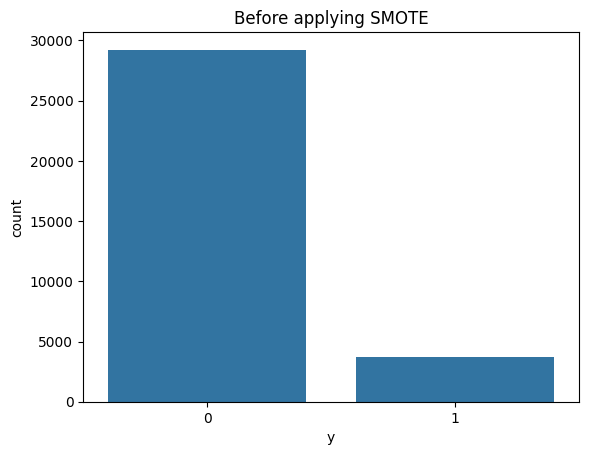

In [ ]:
sns.countplot(x ='y', data = y)
plt.title('Before applying SMOTE')
plt.show()

sns.countplot(x ='y', data = y_re)
plt.title('After applying SMOTE')
plt.show()

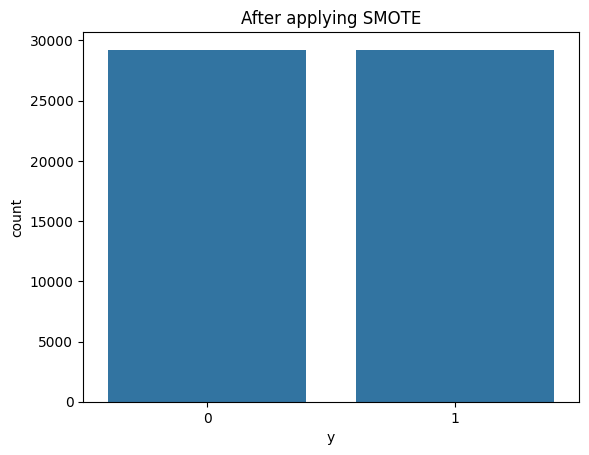

In [ ]:
sns.countplot(x ='y', data = y_re)
plt.title('After applying SMOTE')
plt.show()

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test) * 100))

                   Logistic Regression: 79.38%
                  Gaussian Naive Bayes: 76.08%
                   K-Nearest Neighbors: 87.40%
                Support Vector Machine: 73.80%
                          RandomForest: 93.08%


Confusion Matrix
[[5895 1516]
 [1214 5990]]


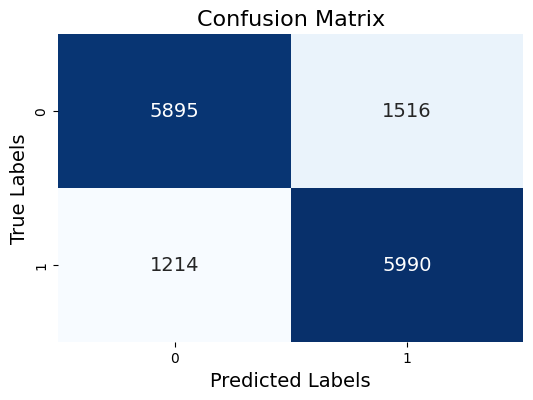

Confusion Matrix
[[4557 2854]
 [ 634 6570]]


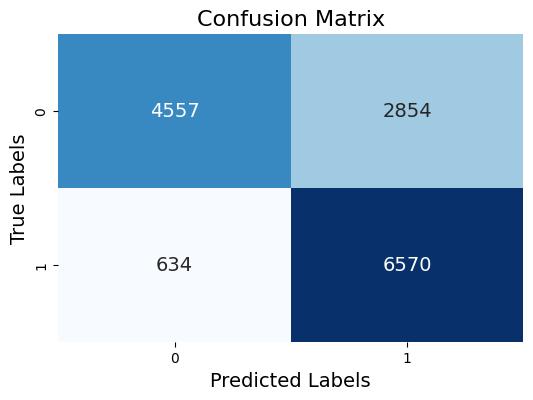

Confusion Matrix
[[5614 1797]
 [  81 7123]]


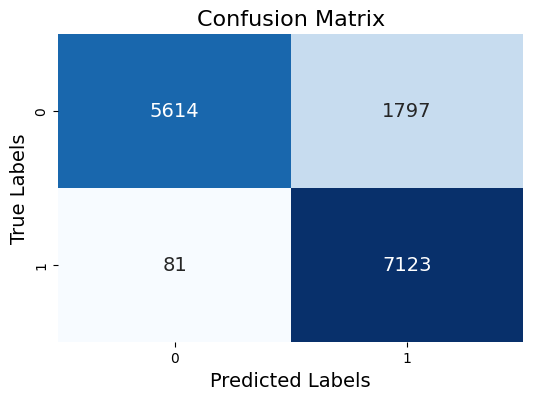

Confusion Matrix
[[5589 1822]
 [1976 5228]]


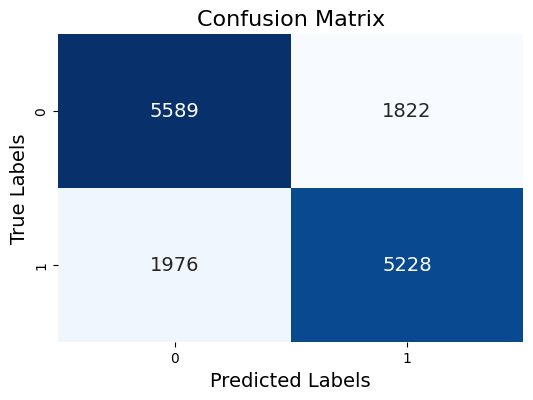

Confusion Matrix
[[6723  688]
 [ 324 6880]]


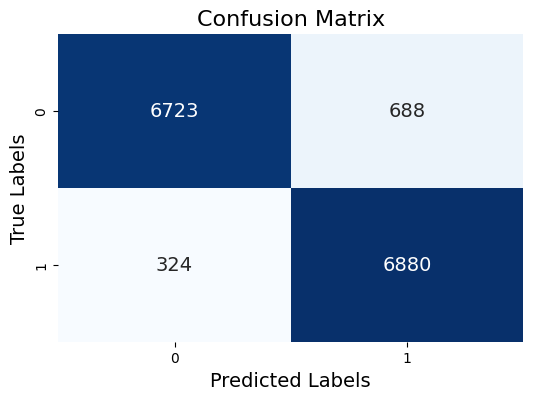

In [ ]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title('Confusion Matrix', fontsize = 16)
  plt.show()

In [ ]:
test.head()

NameError: name 'test' is not defined

In [ ]:
X_train =

In [ ]:
test = test.drop()

In [ ]:
for name, model in models.items():
  y_predicted= model.predict(test)
  print(name , "Prediction : ",y_predicted)


In [ ]:
# dataset of predicted values for target variable y
prediction= pd.DataFrame(y_predicted, columns=["y_predicted"])

prediction_dataset= pd.concat([test, prediction], axis=1)
prediction_dataset
prediction_dataset.to_csv('output.csv', index=False)

